<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/mean__median_most_frequent_constant_imputation_technique_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [18]:
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import mean

In [5]:
original_data = pd.read_csv('/gdrive/My Drive/sepsis_data.psv', sep ='|')
missing_data = original_data.isnull().sum()
missing_percent = (missing_data/original_data.shape[0])*100
refined_columns = list(missing_percent[missing_percent < 92].index)
sepsis_data = original_data[refined_columns]

In [6]:
sepsis_data.values

array([[ 0.000000e+00,  9.900000e+01,  1.000000e+02, ..., -2.000000e-02,
         2.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  9.750000e+01,  1.000000e+02, ..., -2.000000e-02,
         3.000000e+00,  0.000000e+00],
       [ 2.000000e+00,  9.600000e+01,  1.000000e+02, ..., -2.000000e-02,
         4.000000e+00,  0.000000e+00],
       ...,
       [ 1.167199e+06,  1.060000e+02,  9.300000e+01, ..., -3.470000e+00,
         1.700000e+01,  0.000000e+00],
       [ 1.167200e+06,  1.050000e+02,  9.500000e+01, ..., -3.470000e+00,
         1.800000e+01,  0.000000e+00],
       [ 1.167201e+06,  1.130000e+02,  9.200000e+01, ..., -3.470000e+00,
         1.900000e+01,  0.000000e+00]])

In [7]:
sepsis_data.columns

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'FiO2', 'pH', 'Glucose', 'Potassium', 'Hct', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [8]:
sepsis_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
sepsis_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'pH',
       'Glucose', 'Potassium', 'Hct', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [13]:
categorical = sepsis_data.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [14]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)

'SepsisLabel'

In [15]:
features = cont_vars + cat_vars
features

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'HospAdmTime',
 'ICULOS',
 'Gender',
 'Unit1',
 'Unit2']

In [16]:
#split X and y
X=sepsis_data[features]
y=sepsis_data['SepsisLabel']

>mean 0.982 (0.000)
>median 0.982 (0.000)
>most_frequent 0.982 (0.000)
>constant 0.982 (0.000)


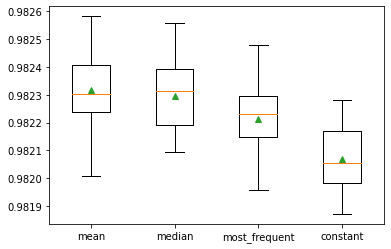

In [19]:
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',
                                                                RandomForestClassifier())])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()